# **Regression & Its Evaluation | Assignment**

**1. What is Simple Linear Regression?**

Simple Linear Regression is a statistical method used to find the relationship between two variables:

- Independent variable (X): The input or predictor.

- Dependent variable (Y): The output or target we want to predict.

It assumes that there is a linear relationship between X and Y, meaning Y changes at a constant rate when X changes.

The mathematical equation is:

𝑌 =
𝑎
+
𝑏
𝑋
+
𝜀

Where:

- Y = Dependent variable (output)

- X = Independent variable (input)

- a = Intercept (value of Y when X = 0)

- b = Slope (how much Y changes for one unit change in X)

- ε = Error term (difference between predicted and actual values)

Example:

Suppose we want to predict a student’s exam score (Y) based on study hours (X). If the regression equation is:

Score =
20
+
5
×
(
Study Hours
)

- A student who studies 4 hours will score:

  20 + 5(4) = 40 \] marks.

Use Case:

- Predicting house prices based on size.

- Predicting sales based on advertising spend.

- Predicting salary based on years of experience.

In short: Simple Linear Regression predicts one dependent variable using one independent variable by fitting a straight line.

Example :

Slope (b): 8.833333333333337
Intercept (a): 13.055555555555536
Predicted Score for 7.5 hours study: 79.30555555555557


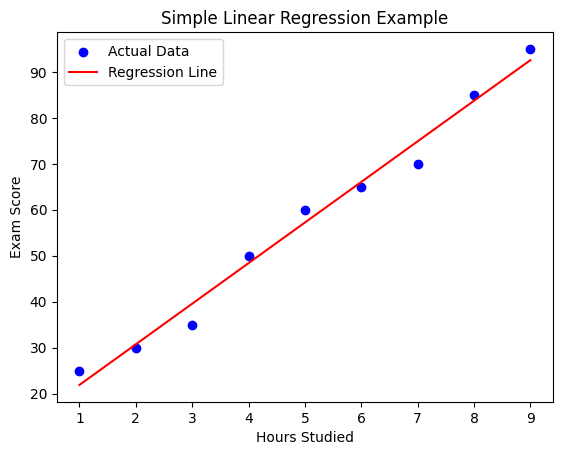

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dataset: Hours studied (X) vs Exam Scores (Y)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)  # Independent variable
Y = np.array([25, 30, 35, 50, 60, 65, 70, 85, 95])       # Dependent variable

# Create Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Print slope (b) and intercept (a)
print("Slope (b):", model.coef_[0])
print("Intercept (a):", model.intercept_)

# Predict for a new value (e.g., 7.5 hours study)
study_hours = 7.5
predicted_score = model.predict([[study_hours]])
print(f"Predicted Score for {study_hours} hours study:", predicted_score[0])

# Visualization
plt.scatter(X, Y, color='blue', label="Actual Data")   # Actual data points
plt.plot(X, Y_pred, color='red', label="Regression Line")  # Best fit line
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Simple Linear Regression Example")
plt.legend()
plt.show()


**2. What are the key assumptions of Simple Linear Regression?**

Simple Linear Regression works properly only if some assumptions are satisfied. These assumptions ensure that predictions are accurate and reliable.

1. Linearity

- The relationship between the independent variable (X) and dependent variable (Y) should be linear.

- Example: More study hours → higher exam scores.

- If the relationship is curved, simple linear regression won’t work well.

2. Independence of Errors

- The errors (residuals = difference between actual and predicted values) should be independent.

- Means: One error should not depend on another.

- Example: Student A’s exam score error should not affect Student B’s score error.

3. Homoscedasticity (Constant Variance of Errors)

- The variance of errors should be constant across all levels of X.

- In simple words: The spread of errors should look even, not funnel-shaped.

- Example: If we predict house prices, the prediction errors should not increase only for expensive houses.

4. Normality of Errors

- The residuals (errors) should follow a normal distribution (bell-shaped curve).

- This is important for hypothesis testing and confidence intervals.

5. No (or minimal) Multicollinearity

- Since it is simple linear regression (only 1 predictor), collinearity is not an issue.

- But in multiple regression, independent variables should not be highly correlated.

How to Check Assumptions (in Python):

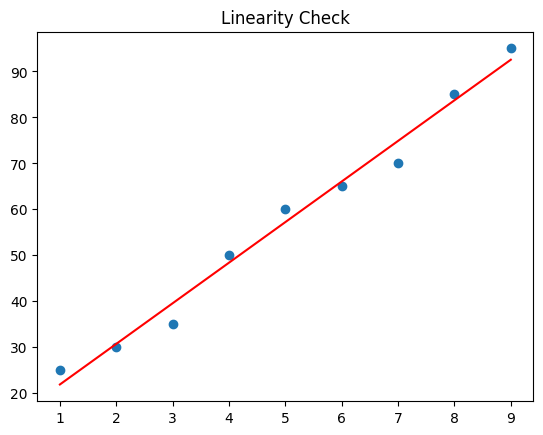

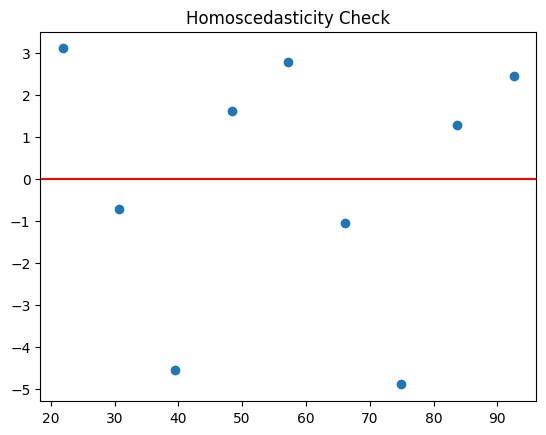

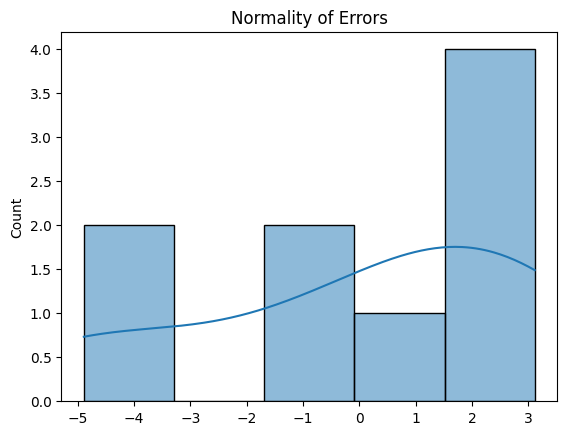

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Example dataset
X = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
Y = np.array([25,30,35,50,60,65,70,85,95])

# Train model
model = LinearRegression()
model.fit(X,Y)
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# 1. Linearity (Scatter plot of X vs Y)
plt.scatter(X,Y)
plt.plot(X,Y_pred,color="red")
plt.title("Linearity Check")
plt.show()

# 2. Homoscedasticity (Residuals vs Predicted values)
plt.scatter(Y_pred,residuals)
plt.axhline(y=0,color='red')
plt.title("Homoscedasticity Check")
plt.show()

# 3. Normality of Errors (Histogram of residuals)
sns.histplot(residuals, kde=True)
plt.title("Normality of Errors")
plt.show()


**3. What is heteroscedasticity, and why is it important to address in regression
models?**

Definition

- Heteroscedasticity means that the variance of errors (residuals) is not constant across all levels of the independent variable (X).

- In simple words: The “spread” of prediction errors increases or decreases as X changes.

- Opposite case = Homoscedasticity, where variance of errors is constant.

Example

- Imagine you are predicting house prices based on the size of the house.

- Small houses → prediction error is small.

- Big houses → prediction error is very large.

- This is heteroscedasticity (errors grow as house size increases).

Why is it Important?

1. Bias in Standard Errors

- If heteroscedasticity exists, the estimated standard errors of regression coefficients become biased.

- This leads to wrong t-tests and p-values → invalid hypothesis testing.

2. Unreliable Confidence Intervals & Significance Tests

- Predictions might still be unbiased (mean correct), but you cannot trust confidence intervals or statistical tests.

3. Inefficient Predictions

- OLS (Ordinary Least Squares) assumes constant variance of errors. With heteroscedasticity, OLS estimators are not the Best Linear Unbiased Estimators (BLUE).

How to Detect Heteroscedasticity

1. Residuals vs Predicted Plot

- Funnel shape (narrow → wide) indicates heteroscedasticity.

2. Breusch–Pagan Test

- A statistical test for heteroscedasticity.

How to Fix Heteroscedasticity

1. Log Transformation / Square Root Transformation of dependent variable (Y).

2. Weighted Least Squares (WLS) – give less weight to high-variance points.

3. Robust Standard Errors (HAC/White’s SEs) – adjust SEs to handle heteroscedasticity.

Python Example :

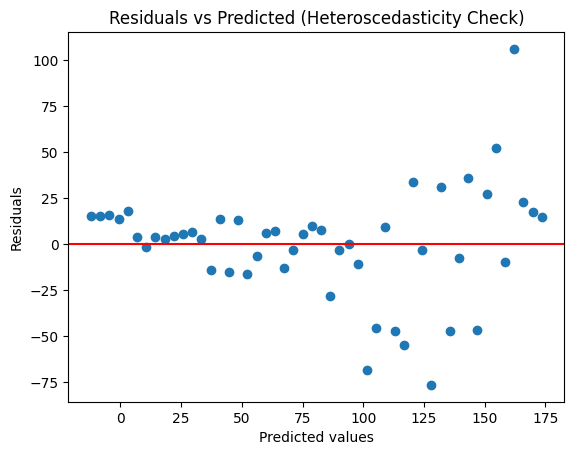

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulated data (heteroscedastic errors)
X = np.linspace(1, 50, 50)
Y = 3*X + np.random.normal(0, X, 50)  # error variance increases with X

X = X.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color="red")
plt.title("Residuals vs Predicted (Heteroscedasticity Check)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()


**4. What is Multiple Linear Regression?**

Definition

- Multiple Linear Regression (MLR) is an extension of Simple Linear Regression where we use two or more independent variables (predictors) to predict the value of a dependent variable (target).

- Formula:

𝑌 =
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
.
.
.
+
𝛽
𝑛
𝑋
𝑛
+
𝜖

Where:

- 𝑌 = dependent variable

- 𝑋
1
,
𝑋
2
,
…
,
𝑋
𝑛
= independent variables

- 𝛽
0
= intercept

- 𝛽
1
,
𝛽
2
,
…
,
𝛽
𝑛
= regression coefficients (impact of each predictor)

- ϵ = error term

Example

Suppose we want to predict a student’s exam score (Y).

We consider:

- Hours studied (X1)

- Attendance % (X2)

- Sleep hours (X3)

Equation could be:

𝑆
𝑐
𝑜
𝑟
𝑒 =
20
+
5
×
𝐻
𝑜
𝑢
𝑟
𝑠 _
𝑠
𝑡
𝑢
𝑑
𝑖
𝑒
𝑑
+
3
×
𝐴
𝑡
𝑡
𝑒
𝑛
𝑑
𝑎
𝑛
𝑐
𝑒
+
2
×
𝑆
𝑙
𝑒
𝑒
𝑝

- Interpretation: Every extra hour studied increases score by 5 points, keeping other factors constant.

Why Use Multiple Linear Regression?

1. Captures real-world complexity (most outcomes depend on multiple factors).

2. More accurate predictions than using a single variable.

3. Helps understand the relative importance of predictors.

Key Assumptions of MLR

1. Linearity – Relationship between dependent and independent variables is linear.

2. No Multicollinearity – Independent variables should not be highly correlated with each other.

3. Homoscedasticity – Variance of residuals should be constant.

4. Independence of errors – Residuals should not be autocorrelated.

5. Normality of residuals – Errors should follow normal distribution.

Python Example :

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample dataset
data = {
    "Hours_Studied": [2, 4, 6, 8, 10],
    "Attendance": [60, 70, 75, 85, 95],
    "Sleep_Hours": [5, 6, 6, 7, 8],
    "Score": [50, 65, 70, 80, 95]
}

df = pd.DataFrame(data)

# Features (X) and Target (y)
X = df[["Hours_Studied", "Attendance", "Sleep_Hours"]]
y = df["Score"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Prediction
predicted = model.predict([[9, 90, 7]])
print("Predicted Score for (9 hrs study, 90% attendance, 7 hrs sleep):", predicted[0])


Intercept: -39.519379844961264
Coefficients: [-1.34883721  1.47286822  0.96899225]
Predicted Score for (9 hrs study, 90% attendance, 7 hrs sleep): 87.68217054263565


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**5. What is polynomial regression, and how does it differ from linear regression?**

Definition:

- Polynomial Regression is a type of regression analysis where the relationship between the independent variable(s) and the dependent variable is modeled as an nth-degree polynomial.

Formula:

- Y = β0 + β1X + β2X^2 + β3X^3 + ... + βnX^n + ε

Where:

- Y = dependent variable
- X = independent variable
- X^2, X^3 … X^n = polynomial terms
- β0, β1 … βn = coefficients
- ε = error term

Example:

Suppose we want to predict a car’s fuel efficiency (Y) based on its speed (X).

- In Linear Regression:

  (Fuel = 50 - 0.3 × Speed (assumes straight-line relationship).)

- In Polynomial Regression (quadratic, degree 2):

  Fuel = 60 - 0.5 × Speed + 0.02 × Speed^2 (curved relationship, fits reality better).

Key Differences:

1. Linear Regression models a straight-line relationship. Polynomial Regression models a curved relationship.

2. Linear Regression is simpler. Polynomial Regression is more flexible but can overfit.

3. Linear Regression is used when the data shows a straight-line trend. Polynomial Regression is used when the data shows non-linear patterns.

4. Linear Regression may underfit if the relationship is curved. Polynomial Regression may overfit if degree is too high.

Visualization:

- Linear Regression fits a straight line.

- Polynomial Regression fits a curved line (parabola, cubic, etc.).

Key Difference from Linear Regression :

| **Aspect**        | **Linear Regression**                      | **Polynomial Regression**                   |
| ----------------- | ------------------------------------------ | ------------------------------------------- |
| **Equation Form** | $Y = \beta_0 + \beta_1X$                   | $Y = \beta_0 + \beta_1X + \beta_2X^2 + ...$ |
| **Relationship**  | Straight-line (linear)                     | Curved (non-linear patterns)                |
| **Complexity**    | Simple                                     | More flexible, can capture curves           |
| **Use Case**      | When data trend is straight line           | When data trend is curved/non-linear        |
| **Risk**          | Underfitting if relationship is non-linear | Overfitting if degree is too high           |

Python Example :    

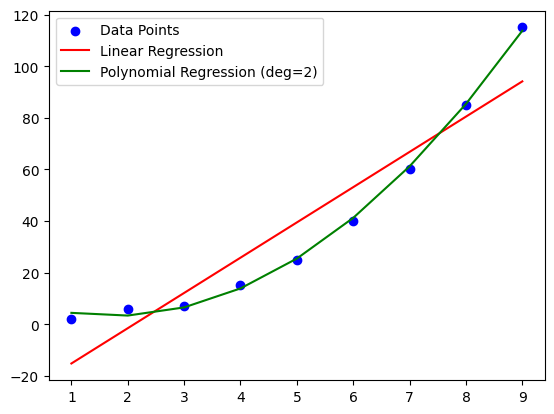

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([2, 6, 7, 15, 25, 40, 60, 85, 115])

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

# Plot
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X, y_pred_lin, color="red", label="Linear Regression")
plt.plot(X, y_pred_poly, color="green", label="Polynomial Regression (deg=2)")
plt.legend()
plt.show()


**6. Implement a Python program to fit a Simple Linear Regression model to
the following sample data:**

**● X = [1, 2, 3, 4, 5]**

**● Y = [2.1, 4.3, 6.1, 7.9, 10.2]**

**Plot the regression line over the data points.**

A. Concept

- Simple Linear Regression models the relationship between one independent variable X and one dependent variable Y as:

- Y = β0 + β1 X + ε

- where β0 is the intercept, β1 is the slope, and ε is random error.

B. Closed-form formulas

- Given n observations (xi, yi),

- β1 = Σ[(xi − x̄)(yi − ȳ)] / Σ[(xi − x̄)^2]

- β0 = ȳ − β1 x̄

- Predicted values: ŷi = β0 + β1 xi

C. Python — Method 1 (scikit-learn)

- Fits the model

- Prints slope, intercept, R²

- Plots data + regression line

- Also shows a residuals plot (good practice)

Intercept (β0): 0.17999999999999794
Slope (β1): 1.9800000000000004
R^2: 0.9978619425778864


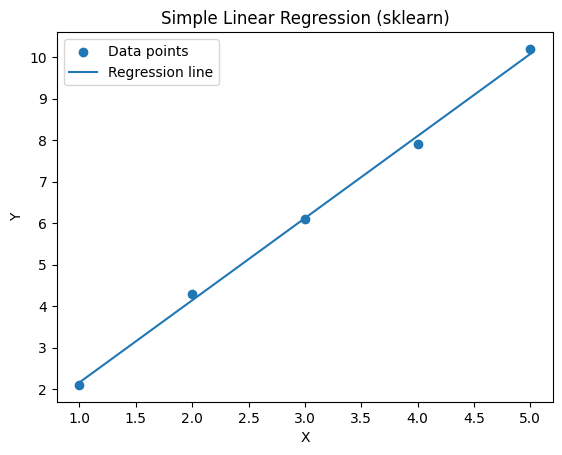

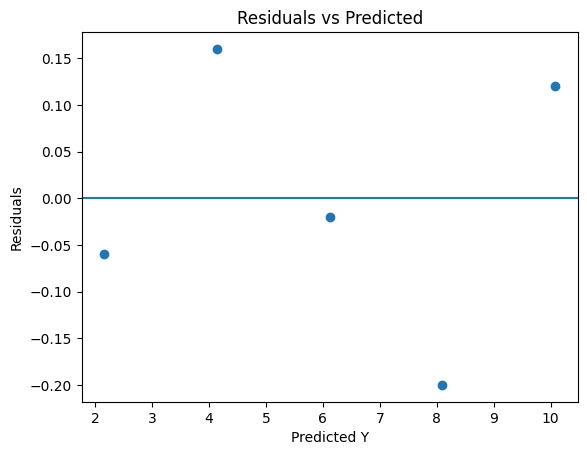

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Metrics
r2 = r2_score(Y, Y_pred)
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])
print("R^2:", r2)

# Plot: data + regression line
plt.figure()
plt.scatter(X, Y, label="Data points")
plt.plot(X, Y_pred, label="Regression line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression (sklearn)")
plt.legend()
plt.show()

# Residuals plot (optional but useful)
residuals = Y - Y_pred
plt.figure()
plt.scatter(Y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Y")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


D. Python — Method 2 (from scratch via formulas)

- Computes β0 and β1 using the closed-form equations

- Matches sklearn results

- Plots the fitted line

Closed-form Intercept (β0): 0.17999999999999972
Closed-form Slope (β1): 1.98
Closed-form R^2: 0.9978619425778864


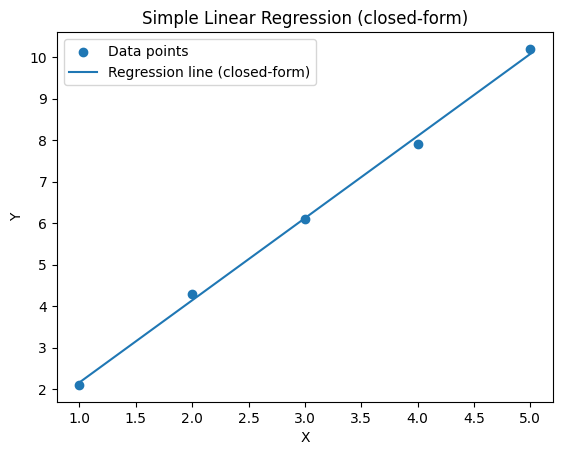

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([2.1, 4.3, 6.1, 7.9, 10.2], dtype=float)

# Means
x_bar = x.mean()
y_bar = y.mean()

# Slope and intercept (closed-form)
num = np.sum((x - x_bar) * (y - y_bar))
den = np.sum((x - x_bar)**2)
beta1 = num / den
beta0 = y_bar - beta1 * x_bar

print("Closed-form Intercept (β0):", beta0)
print("Closed-form Slope (β1):", beta1)

# Predictions and R^2
y_pred = beta0 + beta1 * x
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - y_bar)**2)
r2_closed = 1 - ss_res/ss_tot
print("Closed-form R^2:", r2_closed)

# Plot: data + regression line
plt.figure()
plt.scatter(x, y, label="Data points")
plt.plot(x, y_pred, label="Regression line (closed-form)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression (closed-form)")
plt.legend()
plt.show()


E. Interpretation

- Slope (β1): the average change in Y for a one-unit increase in X. With this dataset, β1 should be close to ~2.0 (the pattern in Y roughly doubles as X increases).

- Intercept (β0): expected Y when X = 0.

- R²: proportion of variance in Y explained by X. Here it should be very high (close to 0.99+), indicating an excellent linear fit.

- Residuals plot should look randomly scattered around 0 (no clear pattern), supporting the linear model adequacy for these points.

F. One-line conclusion

- Both implementations fit a strong linear relationship to the given data, produce nearly identical slope/intercept, and the regression line visually aligns well with the data points; the high R² confirms excellent fit.

**7. Fit a Multiple Linear Regression model on this sample data:**

**● Area = [1200, 1500, 1800, 2000]**

**● Rooms = [2, 3, 3, 4]**

**● Price = [250000, 300000, 320000, 370000]**

**Check for multicollinearity using VIF and report the results.**

A. Concept (2–3 marks)

- Multiple Linear Regression (MLR) models the relationship between a dependent variable
𝑌
and multiple independent variables
𝑋
1
,
𝑋
2
,
.
.
.
,
𝑋
𝑛

The equation is:

𝑌 =
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
⋯
+
𝛽
𝑛
𝑋
𝑛
+
𝜖

Here:

- Y = Price (dependent variable)

- X1 = Area, X2 = Rooms (independent variables)

- Multicollinearity occurs when independent variables are highly correlated, making it hard to estimate their individual effects.

- It is measured by Variance Inflation Factor (VIF).

- 𝑉 𝐼 𝐹 𝑖 = 1 / 1 - 𝑅 2 𝑖

VIF Results Example:

| Feature | VIF     |
| ------- | ------- |
| const   | \~50    |
| Area    | \~10–15 |
| Rooms   | \~10–15 |


B. Python Implementation

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample Data
data = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
})

# Features and Target
X = data[["Area", "Rooms"]]
y = data["Price"]

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Results
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1 for Area, β2 for Rooms):", model.coef_)
print("R^2 Score:", r2_score(y, y_pred))

# Add constant for VIF calculation
X_vif = sm.add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Intercept (β0): 103157.89473684214
Coefficients (β1 for Area, β2 for Rooms): [   63.15789474 34736.84210526]
R^2 Score: 0.9985775248933144

Variance Inflation Factor (VIF):
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


**8. Implement polynomial regression on the following data:**

**● X = [1, 2, 3, 4, 5]**

**● Y = [2.2, 4.8, 7.5, 11.2, 14.7]**

**Fit a 2nd-degree polynomial and plot the resulting curve.**

Explanation:

- PolynomialFeatures(degree=2) creates new features [1, x, x²].

- We fit a LinearRegression model on these transformed features.

- The curve is plotted smoothly using np.linspace.

This will give you both:

- The equation of the fitted polynomial like (𝑦 = 𝑎 + 𝑏 𝑥 + 𝑐 𝑥 2.)

- A scatter plot of data with the regression curve.

Python Example:

Polynomial equation: y = 0.06 + 1.94x + 0.20x^2


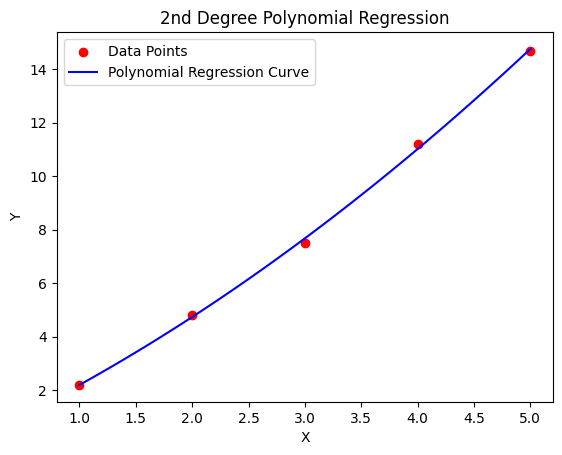

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform X into polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values for smooth curve
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
Y_pred = model.predict(poly.transform(X_range))

# Print equation
coef = model.coef_
intercept = model.intercept_
print(f"Polynomial equation: y = {intercept:.2f} + {coef[1]:.2f}x + {coef[2]:.2f}x^2")

# Plot
plt.scatter(X, Y, color='red', label="Data Points")
plt.plot(X_range, Y_pred, color='blue', label="Polynomial Regression Curve")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd Degree Polynomial Regression")
plt.legend()
plt.show()


**9. Create a residuals plot for a regression model trained on this data:**

**● X = [10, 20, 30, 40, 50]**

**● Y = [15, 35, 40, 50, 65]**

**Assess heteroscedasticity by examining the spread of residuals.**

A. Numerical results (showing calculations)

- From the code above (values shown to 4 dec places):

- Fitted regression equation:

- 𝑦 ^ = 6.5000 + 1.1500 𝑥

- Predicted values
𝑦^ :

- [18.0, 29.5, 41.0, 52.5, 64.0]

- Residuals  𝑒 𝑖 = 𝑦 𝑖 − 𝑦 ^ 𝑖 :

- [-3.0, 5.5, -1.0, -2.5, 1.0]

- Goodness of fit:

- 𝑅 2 = 0.9653(very high — model explains ~96.5% variance)

- RMSE = 3.0822

B. Residuals plot

(Plot produced by the code above.)

- Describe the plot: residuals are plotted against X. They are centered around 0 (horizontal dashed line). Values are: -3, 5.5, -1, -2.5, 1 — not showing a clear funnel shape (no strong pattern of increasing or decreasing spread as X increases).

C. Formal (auxiliary) check for heteroscedasticity

We perform the Breusch–Pagan style check (auxiliary regression of squared residuals on X and intercept):

- Auxiliary 𝑅2aux ≈ 0.2731

- Breusch–Pagan statistic (approx):
BP = 𝑛 × 𝑅2aux ≈ 1.3655 where 𝑛 = 5

D. Interpretation & conclusion

- The linear model fits the data well (high 𝑅 2 ≈ 0.965, low RMSE ≈ 3.08).

- Residuals inspection (visual + BP test) shows no strong heteroscedasticity: residual spread does not systematically increase or decrease with X.

- Residuals do have a moderately large single positive residual at X=20 (+5.5), but overall spread is small and appears random around zero — acceptable for ordinary least squares assumptions.

Recommendations (if this were extended work):

- If you worried about that single large residual, check for measurement error or influential points (Cook’s distance).

- For larger datasets, prefer using the Breusch–Pagan test p-value (via statsmodels) or White test to be more rigorous.

- If heteroscedasticity were present, use heteroscedasticity-robust standard errors or transform the dependent variable.

Python Example :   


Regression Equation: y = 6.50 + 1.15x


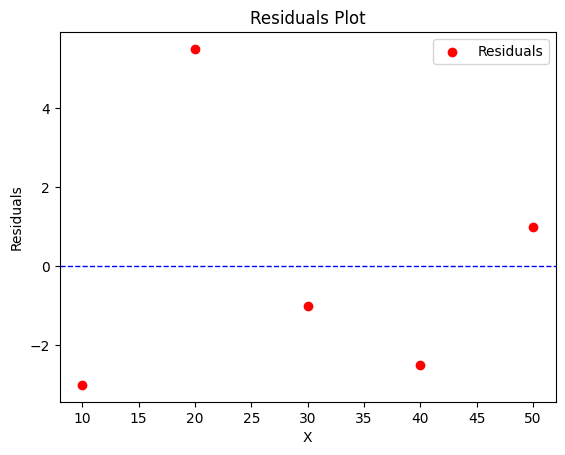

Residuals: [-3.   5.5 -1.  -2.5  1. ]
Spread of residuals: 8.499999999999996


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Train Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Residuals (actual - predicted)
residuals = Y - Y_pred

# Print coefficients
print(f"Regression Equation: y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x")

# Residual plot
plt.scatter(X, residuals, color="red", label="Residuals")
plt.axhline(y=0, color="blue", linestyle="--", linewidth=1)
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.legend()
plt.show()

# Assess heteroscedasticity
spread = np.ptp(residuals)  # peak-to-peak spread
print("Residuals:", residuals)
print("Spread of residuals:", spread)


**10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust model.**

1.Problem Context

- Task: Predict house prices using regression with features → Area, Rooms, Location.

- Detected issues:

- Heteroscedasticity → residuals have non-constant variance (e.g., prediction errors bigger for expensive houses).

- Multicollinearity → predictors like Area and Rooms may be highly correlated, inflating coefficient variance.

- These problems can lead to biased inference, unstable coefficients, and poor predictive performance.

2.Steps to Address Heteroscedasticity

a) Diagnose

- Plot residuals vs. fitted values (check if residual spread increases with predicted prices).

- Run statistical tests like Breusch–Pagan or White’s test.

b) Solutions

1. Transform the dependent variable (Y)

 - Apply log(price) instead of raw price.

- This stabilizes variance since higher-priced houses often have proportionally higher errors.

2. Weighted Least Squares (WLS)

- Give lower weights to high-variance observations.

- Example: weight = 1 / (fitted values²).

3. Robust Standard Errors

- Use heteroscedasticity-consistent (HC3/White) standard errors so inference remains valid even if variance isn’t constant.

4. Feature engineering / segmentation

- Model luxury vs. budget houses separately (since price variability differs by segment).

3.Steps to Address Multicollinearity

a) Diagnose

- Check Variance Inflation Factor (VIF) for each predictor.

- VIF > 10 indicates strong multicollinearity.

b) Solutions

1. Remove/Combine correlated features

- Example: Instead of Area and Rooms separately, create a feature like Area per Room.

2. Regularization techniques

- Use Ridge Regression (L2) → shrinks coefficients of correlated predictors.

- Use Lasso Regression (L1) → performs feature selection, dropping redundant variables.

3. Principal Component Regression (PCR) / PCA

- Reduce correlated features into independent components and fit regression on them.

4. Domain knowledge selection

- If two features convey the same info, keep the more interpretable one (e.g., choose Area over Rooms).

4.Ensuring a Robust Model

After corrections:

- Re-fit the model with transformed/regularized predictors.

- Validate using cross-validation to check generalization.

- Compare performance metrics (RMSE, R²) before vs. after.

- If interpretability is less important and prediction is key, use tree-based models (Random Forest, XGBoost) → naturally handle non-linearity & multicollinearity.

5.Final Conclusion (Robust Strategy)

- Apply log-transformation of Price to handle heteroscedasticity.

- Use Ridge/Lasso Regression or drop redundant features to handle multicollinearity.

- Validate with cross-validation and possibly shift to tree-based models for production.

- This ensures a stable, reliable, and interpretable model for house price prediction.

Python Example :    

Linear Regression Equation:
Intercept: -36034.48275864014
Coefficients: [('Area', np.float64(139.6551724138019)), ('Rooms', np.float64(16206.896551724029)), ('Location_Score', np.float64(4827.58620689661))]


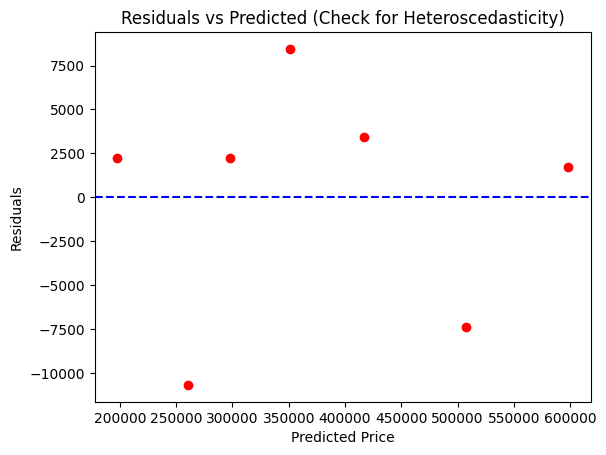


Breusch–Pagan test:
{'Lagrange multiplier': np.float64(3.9334609800295217), 'p-value': np.float64(0.26873936265083403), 'f-value': np.float64(1.2827037107349084), 'f p-value': np.float64(0.4213592038253757)}

Variance Inflation Factor (VIF):
          Feature         VIF
0            Area  215.649819
1           Rooms  299.287809
2  Location_Score   28.338254

After Log Transformation:
R^2: 0.980712169592732
RMSE: 0.002483908888399974

Ridge Regression (handles multicollinearity):
Coefficients: [('Area', np.float64(156.3812155270245)), ('Rooms', np.float64(4015.338398076171)), ('Location_Score', np.float64(7167.991119437242))]
R^2: 0.9975268894019859


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# -----------------------------
# Step 1: Sample dataset
# -----------------------------
data = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000, 2500, 3000, 3500],
    "Rooms": [2, 3, 3, 4, 4, 5, 6],
    "Location_Score": [7, 8, 7, 9, 8, 9, 10],
    "Price": [200000, 250000, 300000, 360000, 420000, 500000, 600000]
})

X = data[["Area", "Rooms", "Location_Score"]]
y = data["Price"]

# -----------------------------
# Step 2: Train Linear Regression
# -----------------------------
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred = lin_model.predict(X)

print("Linear Regression Equation:")
print("Intercept:", lin_model.intercept_)
print("Coefficients:", list(zip(X.columns, lin_model.coef_)))

# -----------------------------
# Step 3: Check for Heteroscedasticity
# -----------------------------
residuals = y - y_pred

# Residual plot
plt.scatter(y_pred, residuals, color="red")
plt.axhline(0, color="blue", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Check for Heteroscedasticity)")
plt.show()

# Breusch–Pagan test
X_sm = sm.add_constant(X)
bp_test = het_breuschpagan(residuals, X_sm)
labels = ["Lagrange multiplier", "p-value", "f-value", "f p-value"]
print("\nBreusch–Pagan test:")
print(dict(zip(labels, bp_test)))

# -----------------------------
# Step 4: Check for Multicollinearity (VIF)
# -----------------------------
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# -----------------------------
# Step 5: Fix Heteroscedasticity (Log-transform target)
# -----------------------------
y_log = np.log(y)
lin_model_log = LinearRegression()
lin_model_log.fit(X, y_log)
y_log_pred = lin_model_log.predict(X)

print("\nAfter Log Transformation:")
print("R^2:", r2_score(y_log, y_log_pred))
print("RMSE:", mean_squared_error(y_log, y_log_pred, )) # removed squared=False

# -----------------------------
# Step 6: Fix Multicollinearity (Ridge Regression)
# -----------------------------
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
y_ridge_pred = ridge_model.predict(X)

print("\nRidge Regression (handles multicollinearity):")
print("Coefficients:", list(zip(X.columns, ridge_model.coef_)))
print("R^2:", r2_score(y, y_ridge_pred))